ssl error in jupyter lab extension

# Week 12 - March 24

## Monday 03/18

### ssl error in jupyter lab extension

Using jupyter lab v4.1.5, when tehre are updates in extensions

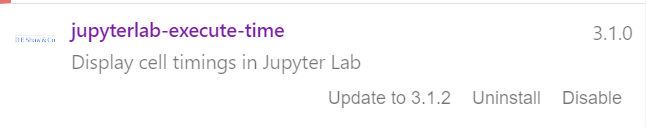

this is tempting to click on Update

Unfortunately I have this error after some time

```python
Error when performing an action.

Reason given:

Error:   WARNING: Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)'))': /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata
  WARNING: Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)'))': /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata
  WARNING: Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)'))': /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata
  WARNING: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)'))': /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata
  WARNING: Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)'))': /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata
ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/91/f0/ef2d353d7e44db6215fc18594b2d1da15c81d3d0c1ac0518e6f484f01595/jupyterlab_execute_time-3.1.2-py3-none-any.whl.metadata (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:992)')))
```

I thought initially it was due to [SSL: CERTIFICATE_VERIFY_FAILED](/posts/2022-09-06-ssl-certificate_verify_failed.html) and I applied my own recipe (run `~/bin/certifi.sh` from my `base_jupyter_v4` environment)

In [2]:
!cat ~/bin/certifi.sh

#!/bin/bash
pip install -U certifi
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`
export TMPDIR=`mktemp -d`
git clone git@gitlab.michelin.com:DEV/bib-certificates.git $TMPDIR
cd $TMPDIR
cat *trust-ca.pem >> $SSL_CERT_FILE


But it didn't help